Episode 1: Success - Steps: 6420 - Explore: 256 - Exploit: 6164
Episode 2: Success - Steps: 3733 - Explore: 152 - Exploit: 3581
Episode 3: Success - Steps: 4672 - Explore: 208 - Exploit: 4464
Episode 4: Success - Steps: 1744 - Explore: 72 - Exploit: 1672
Episode 5: Success - Steps: 3384 - Explore: 138 - Exploit: 3246
Episode 6: Success - Steps: 3319 - Explore: 140 - Exploit: 3179
Episode 7: Max steps taken - Steps: 20000 - Explore: 753 - Exploit: 19247
Episode 8: Success - Steps: 930 - Explore: 34 - Exploit: 896
Episode 9: Failure - Steps: 2457 - Explore: 108 - Exploit: 2349
Episode 10: Success - Steps: 2386 - Explore: 94 - Exploit: 2292
       Run  Episode  Step  Position  Velocity  Action  Reward   Q value
0        1        1     1 -0.524599 -0.001000      -1  -0.010  0.000000
1        1        1     2 -0.524591  0.000007       1  -0.009  0.000000
2        1        1     3 -0.523576  0.001015       1  -0.009 -0.000900
3        1        1     4 -0.523562  0.000015      -1  -0.010 -0.0

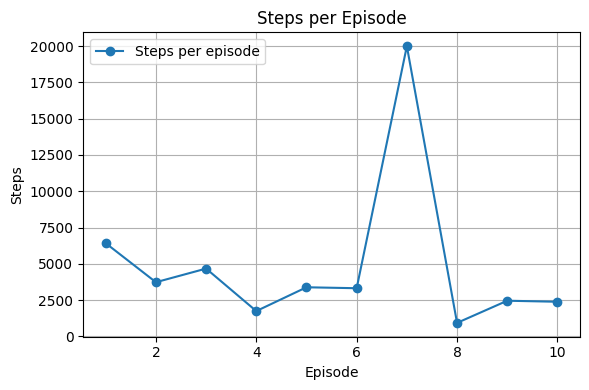

In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Environment and physics parameters
min_position = -1.5
max_position = 1.8
goal_position_hill = math.pi / 6
force = 0.001
gravity = 0.0025
max_speed = 0.07
start_position = -math.pi / 6

# Simulation parameters
num_steps = 20000
episodes = 10
position_bins = 20
action_space = [-1, 1]

# Q learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.04
epsilon_decay = 0.995
epsilon_min = 0.002
run = 0

#Bins for discretising the continous space
position_bin_edges = np.linspace(min_position, max_position, position_bins)

# Q table initialisation
Q = np.zeros((len(position_bin_edges), len(action_space))) 

#data collection for debugging 
data = []
steps_per_episode = []

def run_ep(episode_num, epsilon):
    steps_in_episode = 0
    xplore_no = 0
    exp_no = 0
    data_episode = []

    position = start_position
    velocity = 0.0
    done = False

    while not done: 
        #discretise the state
        state_p = np.digitize(position, position_bin_edges) - 1

        #choosing an action, explore of exploit
        if np.random.rand() < epsilon:
            action_index = np.random.choice(len(action_space))  #exploring
            xplore_no += 1
        else:
            action_index = np.argmax(Q[state_p])  #exploiting
            exp_no += 1

        action = action_space[action_index]

       #Physics stuff to  move the car
        applied_force = action * force
        gradient = np.cos(3 * position)
        velocity += applied_force - (gravity * gradient)
        velocity = np.clip(velocity, -max_speed, max_speed)

        position += velocity
        position = np.clip(position, min_position, max_position)

       #the reward logic 
        reward = 10.0 if abs(position - goal_position_hill) < 0.01 else -0.01
        if position <= min_position:
            reward = -5.0

    #some more reward so that the agent would behave 
        if action > 0:
            reward += 0.001

       #recording data
        data.append({
            "Run": run + 1,
            "Episode": episode_num + 1,
            "Step": steps_in_episode + 1,
            "Position": position,
            "Velocity": velocity,
            "Action": action,
            "Reward": reward,
            "Q value": Q[state_p, action_index]
        })

       #get the new state 
        new_state_p = np.digitize(position, position_bin_edges) - 1

      #update Q learning
        best_future_q = np.max(Q[new_state_p])  
        Q[state_p, action_index] += alpha * (reward + gamma * best_future_q - Q[state_p, action_index])

        steps_in_episode += 1

        #Termination conditions
        if abs(position - goal_position_hill) < 0.01:
            outcome = "Success"
            done = True
        elif position <= min_position:
            outcome = "Failure"
            done = True
        elif steps_in_episode == num_steps:
            outcome = "Max steps taken"
            done = True

    print(f"Episode {episode_num + 1}: {outcome} - Steps: {steps_in_episode} - Explore: {xplore_no} - Exploit: {exp_no}")
    return data_episode, steps_in_episode

#run the episodes
for episode in range(episodes):
    episode_data, steps = run_ep(episode, epsilon)
    data.extend(episode_data)
    steps_per_episode.append(steps)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)  #exponential decay
    
#convert the data into dataframe for viewing
df = pd.DataFrame(data)
print(df)

#plotting steps per episode for all 10 episodes
plt.figure(figsize=(6, 4))
plt.plot(range(1, episodes + 1), steps_per_episode, marker="o", label="Steps per episode")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Success in run 1: 9, steps: 29666
Success in run 2: 9, steps: 52822
Success in run 3: 7, steps: 63074
Success in run 4: 9, steps: 45671
Success in run 5: 7, steps: 51078
Success in run 6: 8, steps: 37951
Success in run 7: 9, steps: 57260
Success in run 8: 9, steps: 53702
Success in run 9: 9, steps: 46142
Success in run 10: 6, steps: 50141
Total success:  82
Average step run:  48750.7
[9324.3 4887.1 6733.9 3692.5 2585.  2585.9 3178.5 4797.9 5052.3 5913.3]


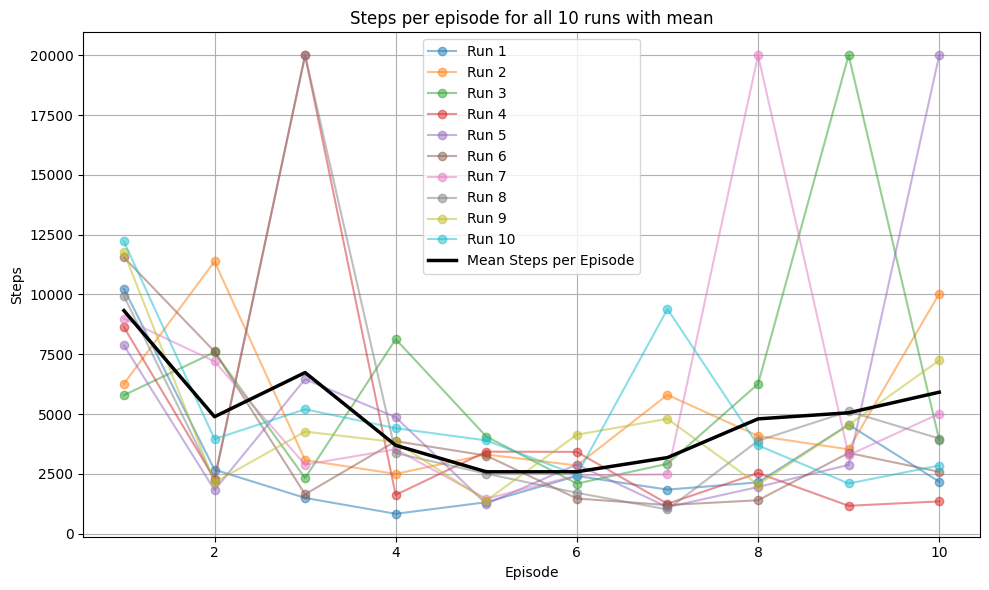

        Run  Episode  Step  Position  Velocity  Action  Reward   Q value
0         1        1     1 -0.524599 -0.001000      -1  -0.010  0.000000
1         1        1     2 -0.524591  0.000007       1  -0.009  0.000000
2         1        1     3 -0.523576  0.001015       1  -0.009 -0.000900
3         1        1     4 -0.523562  0.000015      -1  -0.010 -0.001000
4         1        1     5 -0.522547  0.001014       1  -0.009 -0.001799
...     ...      ...   ...       ...       ...     ...     ...       ...
487502   10       10  2843  0.462976  0.016731      -1  -0.010  3.276170
487503   10       10  2844  0.478255  0.015279      -1  -0.010  3.271894
487504   10       10  2845  0.492195  0.013940      -1  -0.010  3.267622
487505   10       10  2846  0.504900  0.012705      -1  -0.010  3.263354
487506   10       10  2847  0.516464  0.011565      -1  10.000  3.259091

[487507 rows x 8 columns]


In [13]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Environment and physics parameters
min_position = -1.5
max_position = 1.8
goal_position_hill = math.pi / 6
force = 0.001
gravity = 0.0025
max_speed = 0.07
start_position = -math.pi / 6

# Simulation parameters
num_steps = 20000
episodes = 10
position_bins = 20
action_space = [-1, 1]

# Q learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.04
epsilon_decay = 0.995
epsilon_min = 0.002
run = 0

#Bins for discretising the continous space
position_bin_edges = np.linspace(min_position, max_position, position_bins)

# Q table initialisation
Q = np.zeros((len(position_bin_edges), len(action_space))) 

#data collection for debugging 
data = []
steps_per_episode = []

def run_ep(episode_num, epsilon):
    steps_in_episode = 0
    xplore_no = 0
    exp_no = 0
    data_episode = []
    success = 0

    position = start_position
    velocity = 0.0
    done = False

    while not done: 
        #discretise the position state, one dimensional binning
        state_p = np.digitize(position, position_bin_edges) - 1

        #choosing an action, explore of exploit
        if np.random.rand() < epsilon:
            action_index = np.random.choice(len(action_space))  #exploring
            xplore_no += 1
        else:
            action_index = np.argmax(Q[state_p])  #exploiting
            exp_no += 1

        action = action_space[action_index]

       #Physics stuff to  move the car
        applied_force = action * force
        gradient = np.cos(3 * position)
        velocity += applied_force - (gravity * gradient)
        velocity = np.clip(velocity, -max_speed, max_speed)

        position += velocity
        position = np.clip(position, min_position, max_position)

       #the reward logic 
        reward = 10.0 if abs(position - goal_position_hill) < 0.01 else -0.01
        if position <= min_position:
            reward = -5.0

    #some more reward so that the agent would behave 
        if action > 0:
            reward += 0.001

       #recording data
        data.append({
            "Run": run + 1,
            "Episode": episode_num + 1,
            "Step": steps_in_episode + 1,
            "Position": position,
            "Velocity": velocity,
            "Action": action,
            "Reward": reward,
            "Q value": Q[state_p, action_index]
        })

       #get the new state 
        new_state_p = np.digitize(position, position_bin_edges) - 1

      #update Q learning
        best_future_q = np.max(Q[new_state_p])  
        Q[state_p, action_index] += alpha * (reward + gamma * best_future_q - Q[state_p, action_index])

        steps_in_episode += 1

        #Termination conditions
        if abs(position - goal_position_hill) < 0.01:
            outcome = "Success"
            success += 1
            done = True
        elif position <= min_position:
            outcome = "Failure"
            done = True
        elif steps_in_episode == num_steps:
            outcome = "Max steps taken"
            done = True

            #Uncomment this to see the runs in more detail
   # print(f'Run {run + 1} Episode {episode_num + 1}: {outcome} - Steps: {steps_in_episode} - Explore: {xplore_no} - Exploit: {exp_no}')
    return steps_in_episode, success



#Data for plotting for all 10 runs with 10 episodes
steps_per_run = []
total_success = 0
total_run_steps = 0 #to calculate total steps from all runs
for run in range(10): 
    Q = np.zeros((len(position_bin_edges), len(action_space))) #resetting the Q table for each run
    steps_per_episode = []
    success_per_ep = 0 # successful outcomes per episode
    success_per_run =0  # successful outcomes per run, its data will be used for finding the sum of overall successful outcomes to measure performance
    epsilon = 0.04 # resetting epsilon for each run
    steps_one_run = 0  #collects steps for one run, its data will be used for calculating the average of all runs
    
    for episode in range(episodes):         
        steps, success_no = run_ep(episode, epsilon)        
        steps_per_episode.append(steps)
        success_per_ep += success_no
        steps_one_run += steps
        epsilon = max(epsilon * epsilon_decay, epsilon_min)  #exponential decay per episode

    steps_per_run.append(steps_per_episode)
    success_per_run += success_per_ep #successful outcomes per run
    total_success += success_per_run # total successful outcomes 
    total_run_steps += steps_one_run #total steps from all runs
    print(f"Success in run {run + 1}: {success_per_run}, steps: {steps_one_run}")  #shows all successful outcomes in each run along with steps for each run

average_steps_per_run = total_run_steps / 10 # average steps per run to check performance

#printing data for performance
print("Total success: ", total_success)
print("Average step run: ", average_steps_per_run) #shows the sum of all successful outcomes of all 10 runs

#Calculate the mean steps per episode across all runs
mean_steps = np.mean(steps_per_run, axis=0)
print(mean_steps)


#Plotting all 10 runs and 10 episodes
plt.figure(figsize=(10, 6))
for run_id, steps in enumerate(steps_per_run):
    plt.plot(range(1, episodes + 1), steps, marker="o", label=f"Run {run_id + 1}", alpha=0.5)

plt.plot(range(1, episodes + 1), mean_steps, color="black", linewidth=2.5, label=2Mean Steps per Episode')
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per episode for all 10 runs with mean")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df = pd.DataFrame(data)
print(df)

